In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

df = pd.read_csv('listings.csv')

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


In [3]:
# understand the shape of the dataset
df.shape

(36923, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36923 non-null  int64  
 1   name                            36910 non-null  object 
 2   host_id                         36923 non-null  int64  
 3   host_name                       36914 non-null  object 
 4   neighbourhood_group             36923 non-null  object 
 5   neighbourhood                   36923 non-null  object 
 6   latitude                        36923 non-null  float64
 7   longitude                       36923 non-null  float64
 8   room_type                       36923 non-null  object 
 9   price                           36923 non-null  int64  
 10  minimum_nights                  36923 non-null  int64  
 11  number_of_reviews               36923 non-null  int64  
 12  last_review                     

In [5]:
#number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

reviews_per_month                 9384
last_review                       9384
name                                13
host_name                            9
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_id                              0
id                                   0
dtype: int64

In [6]:
#Below code shows the columns names that have some missing values and number of unique values in that column
df.nunique()[df.nunique() != len(df)].sort_values(ascending=False)

name                              35897
host_id                           27001
latitude                          16985
longitude                         13473
host_name                          9109
last_review                        2179
price                               761
reviews_per_month                   743
number_of_reviews                   392
availability_365                    366
neighbourhood                       221
minimum_nights                      118
calculated_host_listings_count       57
neighbourhood_group                   5
room_type                             4
dtype: int64

**Columns with missing data are:**
- name
- host_name
- last_review
- reviews_per_month

In [7]:
# check name missing data
df[df['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1875,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
2405,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,30,28,2015-06-08,0.35,1,313
3787,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,30,1,2015-01-01,0.01,1,0
3911,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,30,5,2016-01-02,0.07,1,0
4111,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,30,0,NaN,NaN,1,0


In [8]:
# check host name missing data
df[df['host_name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2813,2835711,Sunny West Village Apartment on MacDougal Street,3237504,NaN,Manhattan,Greenwich Village,40.73083,-74.00060,Entire home/apt,64,30,45,2020-11-21,0.56,1,212
3980,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,30,0,NaN,NaN,1,0
4319,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,30,1,2015-10-20,0.02,1,0
5438,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,30,1,2015-07-01,0.02,1,0
6025,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,30,0,NaN,NaN,1,0


In [9]:
# check last review missing data
df[df['last_review'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80139,-73.94244,Private room,65,30,0,NaN,NaN,2,365
10,7750,2 Furnished bedrooms next to Central Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Private room,96,30,0,NaN,NaN,2,178
18,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,30,0,NaN,NaN,1,365
113,45935,Room in Beautiful Townhouse.,204586,L,Bronx,Port Morris,40.80640,-73.92395,Private room,60,30,0,NaN,NaN,1,83
120,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,NaN,2,0


### last_review and reviews_per_month data is null because there has never been a booking/stay at that location.

Therefore I can replace all the null values with 0.

In [10]:
# replacing null values with 0
df['last_review'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36923 non-null  int64  
 1   name                            36910 non-null  object 
 2   host_id                         36923 non-null  int64  
 3   host_name                       36914 non-null  object 
 4   neighbourhood_group             36923 non-null  object 
 5   neighbourhood                   36923 non-null  object 
 6   latitude                        36923 non-null  float64
 7   longitude                       36923 non-null  float64
 8   room_type                       36923 non-null  object 
 9   price                           36923 non-null  int64  
 10  minimum_nights                  36923 non-null  int64  
 11  number_of_reviews               36923 non-null  int64  
 12  last_review                     

### Since there's no way to get the missing 9-13 name and host name values and they're a negligible size relative to the nearly 37,000 entries, I can comfortably remove these rows.

In [12]:
df = df.dropna(how='any',axis=0) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36901 entries, 0 to 36922
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36901 non-null  int64  
 1   name                            36901 non-null  object 
 2   host_id                         36901 non-null  int64  
 3   host_name                       36901 non-null  object 
 4   neighbourhood_group             36901 non-null  object 
 5   neighbourhood                   36901 non-null  object 
 6   latitude                        36901 non-null  float64
 7   longitude                       36901 non-null  float64
 8   room_type                       36901 non-null  object 
 9   price                           36901 non-null  int64  
 10  minimum_nights                  36901 non-null  int64  
 11  number_of_reviews               36901 non-null  int64  
 12  last_review                     

In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


## Potential Questions:

1. What is the price breakdown by borough?
2. What are the price & demand characteristics of the 4 room types?
3. Do hosts with multiple listings perform better or worse?
4. What, if any, specific words in listing title's tend to drive higher demand and/or prices?

### 1. What is the price breakdown by borough?

In [15]:
borough = df.groupby('neighbourhood_group')['price'].mean()
borough = borough.reset_index()
borough

,neighbourhood_group,price
0,Bronx,92.522436
1,Brooklyn,120.283903
2,Manhattan,183.249143
3,Queens,104.632966
4,Staten Island,110.851449


Text(0, 0.5, 'Price ($)')

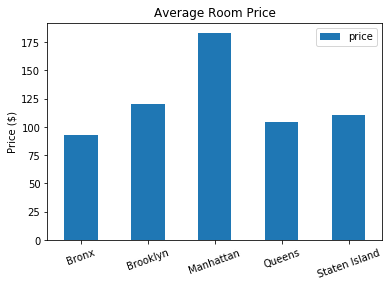

In [16]:
borough.plot.bar(x ='neighbourhood_group', y='price', rot=20, title="Average Room Price");
plt.xlabel('')
plt.ylabel('Price ($)')

Manhattan is clearly the most expensive borough in New York on AirBnB ($183)

The Bronx is the cheapest ($93) 

The 3 other boroughs have roughly the same average price ($100-120)

### 2. What are the price & demand characteristics of the 4 room types?

In [17]:
# check for the amount of each room type in the dataset
room_type_count = df.room_type.value_counts()
room_type_count = room_type_count.reset_index()
room_type_count

,index,room_type
0,Entire home/apt,19459
1,Private room,16468
2,Shared room,677
3,Hotel room,297


**Clearly entire home/apartments & private rooms are the most popular room types for AirBnB.**

In [18]:
room_type_price = df.groupby('room_type')['price'].mean()
room_type_price = room_type_price.reset_index()
room_type_price

,room_type,price
0,Entire home/apt,194.149854
1,Hotel room,287.111111
2,Private room,87.714234
3,Shared room,113.584934


However, hotel rooms happen to be the more expensive room types.

Text(0, 0.5, 'Price ($)')

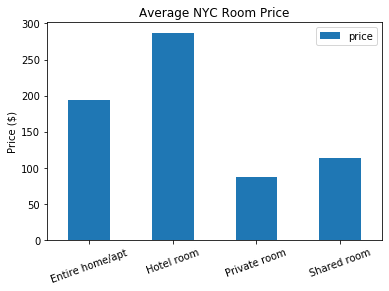

In [19]:
room_type_price.plot.bar(x ='room_type', y='price', rot=20, title="Average NYC Room Price");
plt.xlabel('')
plt.ylabel('Price ($)')

### 3. Do hosts with multiple listings perform better or worse?

Text(0, 0.5, 'Reviews Per Month')

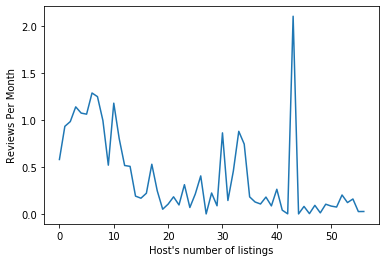

In [88]:
# create a line chart of the average reviews per month by the # of listings the host has
num_lis = df.groupby('calculated_host_listings_count')['reviews_per_month'].mean()
num_lis = num_lis.reset_index()
num_lis.reviews_per_month.plot.line()
plt.xlabel("Host's number of listings")
plt.ylabel('Reviews Per Month')

Besides an outlier around 42 listings, **there is a clear sweetspot of 2-9 listings per host** that would seem to optimize the demand for those AirBnB's.

It is likely that the clear dropoff around 15 listings is due to the fact that these **hosts struggle to operate this large number of listings efficiently.**

### 4. 

In [59]:
import numpy as np

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [60]:
df['dest_lon'] = 40.7580

In [61]:
df['dest_lat'] = 73.9855

In [62]:
df['haversine_dist'] = haversine_vectorize(df['longitude'],df['latitude'],df['dest_lon'],df['dest_lat'])

In [63]:
df.haversine_dist.sort_values()

35978    6349.109756
33264    6349.667007
27370    6349.744502
15944    6349.860619
25822    6349.982470
            ...     
13668    6396.528460
27509    6396.867403
24847    6398.328990
11863    6398.881906
950      6401.641186
Name: haversine_dist, Length: 36901, dtype: float64

In [64]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_from_downtown,dest_lon,dest_lat,haversine_dist
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365,10394.922857,40.758,73.9855,6369.237307
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307,10401.080268,40.758,73.9855,6375.900459
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365,10400.774024,40.758,73.9855,6375.620579
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0,10393.775669,40.758,73.9855,6368.048456
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0,10389.458424,40.758,73.9855,6363.713852


Text(0, 0.5, 'Price')

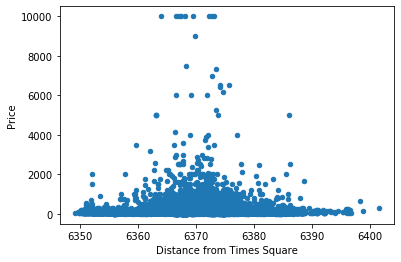

In [67]:
df.plot.scatter(x='haversine_dist', y='price')
plt.xlabel('Distance from Times Square')
plt.ylabel('Price')

In [68]:
room_type_demand = df.groupby(['neighbourhood','room_type'])['reviews_per_month','price'].mean().sort_values(by='reviews_per_month', ascending=False)
room_type_demand = room_type_demand.reset_index()
room_type_demand.head(20)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,neighbourhood,room_type,reviews_per_month,price
0,Jamaica,Shared room,4.947500,33.250000
1,SoHo,Hotel room,4.814286,275.523810
2,Huguenot,Entire home/apt,4.620000,180.000000
3,Woodlawn,Private room,4.206667,33.333333
4,Castle Hill,Entire home/apt,4.135000,68.000000
5,Chelsea,Hotel room,3.903333,46.666667
6,Flatiron District,Hotel room,3.870000,110.333333
7,Richmond Hill,Shared room,3.750000,123.000000
8,New Dorp Beach,Private room,3.673333,68.333333
9,Financial District,Hotel room,3.285263,255.894737


### Which suburb of Manhattan should we focus on building more 'stays'? The busiest (reviews per month)

In [69]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_from_downtown,dest_lon,dest_lat,haversine_dist
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365,10394.922857,40.758,73.9855,6369.237307
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307,10401.080268,40.758,73.9855,6375.900459
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365,10400.774024,40.758,73.9855,6375.620579
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0,10393.775669,40.758,73.9855,6368.048456
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0,10389.458424,40.758,73.9855,6363.713852


In [70]:
manhattan = df[df['neighbourhood_group'] == 'Manhattan']
brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']
bronx = df[df['neighbourhood_group'] == 'Bronx']
queens = df[df['neighbourhood_group'] == 'Queens']
staten_island = df[df['neighbourhood_group'] == 'Staten Island']

In [71]:
manhattan.shape

(16629, 20)

In [73]:
manhattan_total = manhattan.groupby('neighbourhood')['price','reviews_per_month'].mean()
manhattan_total = manhattan_total.reset_index()
manhattan_total.sort_values('reviews_per_month', ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,neighbourhood,price,reviews_per_month
16,Marble Hill,86.222222,0.921111
23,SoHo,268.123239,0.835282
4,East Harlem,143.963989,0.792396
25,Theater District,264.555195,0.726851
11,Hell's Kitchen,187.663844,0.672658
6,Financial District,167.983740,0.671321
10,Harlem,114.624423,0.665331
22,Roosevelt Island,113.291667,0.658542
1,Chelsea,204.314385,0.656717
27,Two Bridges,100.522388,0.642537


In [74]:
brooklyn_total = brooklyn.groupby('neighbourhood')['price','reviews_per_month'].mean()
brooklyn_total = brooklyn_total.reset_index()
brooklyn_total.sort_values('reviews_per_month', ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,neighbourhood,price,reviews_per_month
4,Bergen Beach,121.416667,1.723333
33,Manhattan Beach,84.600000,1.534000
0,Bath Beach,78.333333,1.481667
11,Canarsie,107.632812,1.478047
9,Brownsville,91.545455,1.465636
16,Coney Island,82.538462,1.315385
18,Cypress Hills,140.969072,1.314845
23,East New York,91.021505,1.308226
21,Dyker Heights,85.062500,1.051250
25,Flatlands,114.082192,0.978904


In [75]:
# create series to analyse room type breakdown per borough 
brooklyn_room = brooklyn.groupby('room_type')['price'].mean()
manhattan_room = manhattan.groupby('room_type')['price'].mean()
queens_room = queens.groupby('room_type')['price'].mean()
bronx_room = bronx.groupby('room_type')['price'].mean()
staten_room = staten_island.groupby('room_type')['price'].mean()

In [76]:
manhattan_room

room_type
Entire home/apt    218.185266
Hotel room         300.355556
Private room       120.292059
Shared room        144.615917
Name: price, dtype: float64

In [86]:
# 2 factor breakdown with neighbourhood as well
brooklyn_adv = brooklyn.groupby(['neighbourhood','room_type'])['price'].mean()
brooklyn_adv = brooklyn_adv.reset_index()
brooklyn_adv.sort_values('price', ascending=False)

,neighbourhood,room_type,price
7,Bedford-Stuyvesant,Hotel room,1000.000000
115,Sea Gate,Entire home/apt,486.400000
71,Flatlands,Shared room,356.333333
50,Cypress Hills,Entire home/apt,313.903226
117,Sheepshead Bay,Entire home/apt,287.485294
...,...,...,...
27,Brownsville,Shared room,27.000000
78,Gerritsen Beach,Private room,22.666667
111,Prospect-Lefferts Gardens,Shared room,22.000000
2,Bath Beach,Shared room,18.000000


In [80]:
williamsburg = brooklyn[brooklyn['neighbourhood']=='Williamsburg']
williamsburg.groupby('room_type')['price'].mean()

room_type
Entire home/apt    192.131618
Hotel room           0.000000
Private room        77.879794
Shared room         98.318182
Name: price, dtype: float64

In [81]:
dumbo = brooklyn[brooklyn['neighbourhood']=='DUMBO']
dumbo.groupby('room_type')['price'].mean()

room_type
Entire home/apt    229.272727
Private room       126.100000
Name: price, dtype: float64

In [82]:
brooklyn.neighbourhood.value_counts()

Williamsburg                 2740
Bedford-Stuyvesant           2690
Bushwick                     1651
Crown Heights                1110
Greenpoint                    806
Flatbush                      436
Clinton Hill                  428
Prospect-Lefferts Gardens     378
East Flatbush                 376
Park Slope                    358
Fort Greene                   347
Sunset Park                   310
Prospect Heights              229
South Slope                   206
East New York                 186
Gowanus                       173
Carroll Gardens               164
Boerum Hill                   135
Canarsie                      128
Bay Ridge                     125
Sheepshead Bay                124
Kensington                    121
Brooklyn Heights              116
Cypress Hills                  97
Borough Park                   90
Windsor Terrace                89
Midwood                        87
Cobble Hill                    76
Flatlands                      73
Red Hook      

In [83]:
queens_room

room_type
Entire home/apt    162.623400
Hotel room         136.000000
Private room        68.611756
Shared room        154.572464
Name: price, dtype: float64

In [84]:
LES = manhattan[manhattan['neighbourhood']=='Lower East Side']

In [85]:
LES.groupby('room_type')['price'].mean()

room_type
Entire home/apt    221.194373
Hotel room         602.333333
Private room       208.076046
Shared room         79.333333
Name: price, dtype: float64